In [24]:
# 1.) Importing the necssary files.
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
# 2.) Loading the dataset.
# Make sure the file is in the same folder as your script/notebook
file_name = '/content/IPL sample data.xlsx'
# Read the entire sheet first to locate the data
df_raw = pd.read_excel(file_name)

In [26]:
# 3.) Finding where the "Performance Matrix" starts
mask = df_raw.iloc[:, 1] == "Player Name"
header_row_index = df_raw[mask].index[0]

In [27]:
# 4.) Reloading the dataset starting from that header.
df_analysis = pd.read_excel(file_name, skiprows=header_row_index + 1)

df_analysis = df_analysis.iloc[0:7].copy()

In [28]:
# 5.) Cleaning and renaming the columns for the formula.
df_analysis.columns = ['ID', 'Player', 'CP', 'GT', 'C', 'DC', 'ST', 'RO', 'MRO', 'DH', 'RS', 'Orig_PS', 'Extra']

cols_to_keep = ['Player', 'CP', 'GT', 'C', 'DC', 'ST', 'RO', 'MRO', 'DH', 'RS']
df_analysis = df_analysis[cols_to_keep]

metrics = ['CP', 'GT', 'C', 'DC', 'ST', 'RO', 'MRO', 'DH', 'RS']
df_analysis[metrics] = df_analysis[metrics].apply(pd.to_numeric, errors='coerce').fillna(0)


In [29]:
# 6.) Applying the Performance Score (PS) Formula.
df_analysis['Calculated_PS'] = (
    (df_analysis['CP'] * 1) +
    (df_analysis['GT'] * 1) +
    (df_analysis['C'] * 3) -
    (df_analysis['DC'] * 3) +
    (df_analysis['ST'] * 3) +
    (df_analysis['RO'] * 3) -
    (df_analysis['MRO'] * 2) +
    (df_analysis['DH'] * 2) +
    df_analysis['RS']
)


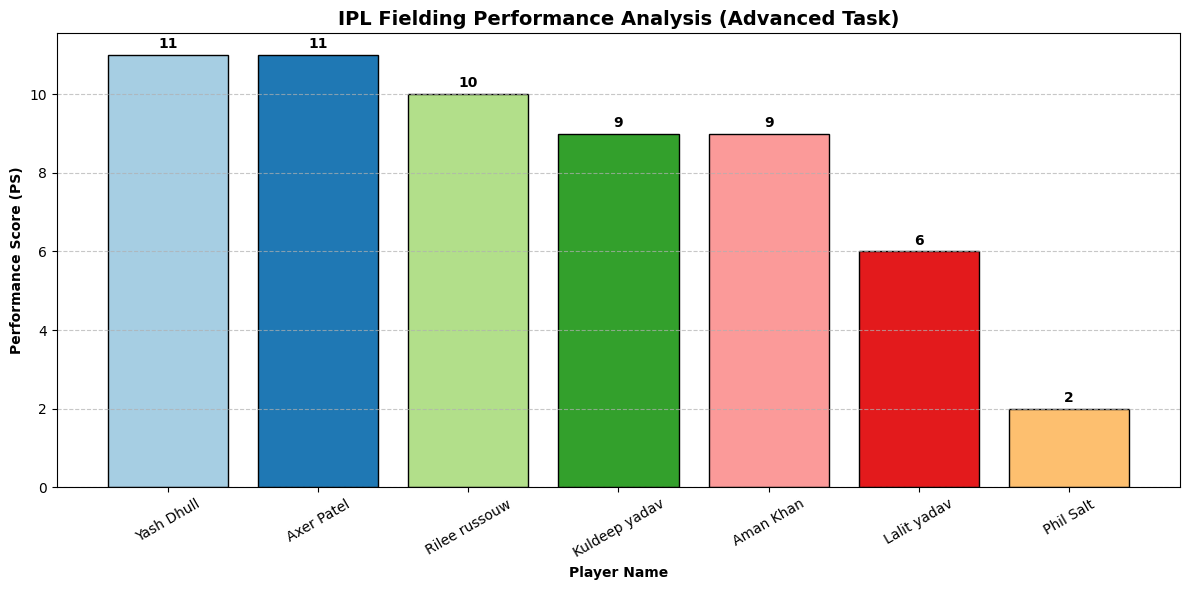

In [30]:
# 7.) Visualizations.
plt.figure(figsize=(12, 6))
df_sorted = df_analysis.sort_values(by='Calculated_PS', ascending=False)

colors = plt.cm.Paired(range(len(df_sorted)))
bars = plt.bar(df_sorted['Player'], df_sorted['Calculated_PS'], color=colors, edgecolor='black')

plt.xlabel('Player Name', fontweight='bold')
plt.ylabel('Performance Score (PS)', fontweight='bold')
plt.title('IPL Fielding Performance Analysis (Advanced Task)', fontsize=14, fontweight='bold')
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{int(height)}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

In [ ]:
# 7.) Saving the CSV file.
df_analysis.to_csv('Fielding_Performance_Results.csv', index=False)
print("Success! Analysis complete and saved to 'Fielding_Performance_Results.csv'.")